## 1. Multi-Class Classification:
For the multiclass classification problem, there were six different datasets. Some of the datasets contain missing values. For example, TrainData1, TestData1 and TrainData3 contain some missing values (1.00000000000000e+99). Therefore, the first approach needs to handle the missing values for selecting the features. Then compare the accuracy on train dataset to find out which classifier gives best result for each dataset with cross validation to verify the accuracy based on test dataset.
<center><div style='width:50%; height:50%'><img src='images/Q1_table.jpg'></div></center>

Hint:
* Missing Value Estimation
    - (KNN method for imputation of the missing values)
* Dimensionality Reduction
* Use Several Classifiers/ Ensemble Method
    - Logistic Regression (with different c values)
    - Random Forest (with different estimator values)
    - SVM (with different kernels)
    - KNN (with k = 1,2,5,10,20)
    - K (3,5,10) Fold Cross Validation
* Performance Comparison
    - Classification Accuracy, Precision, Recall, Sensitivity, Specificity
    - AUC, ROC Curve

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Python magic
# %matplotlib inline

# Base packages
import gc, sys, re, os, math
from time import strptime, mktime

# Data processing/preprocessing/modeling packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)

# Sklearn: KNN, SVM, LR, RF
from sklearn.neighbors import KNeighborsClassifier
from impyute.imputation.cs import fast_knn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.svm import *
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import *
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, accuracy_score

# DT packages
# from six import StringIO
# from IPython.display import Image
# from pydotplus import *

In [6]:
def getAccuracyMetrics(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cra = classification_report(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    return cm, cra, acc

In [60]:
def seperateClassifiers(X_test):
    classes = {}
    tmp = []
    for i in Y:
        tmp.append(i)
    

In [61]:
def optimizeK(X_train, y_train, X_test, y_test):
    neighbors = np.arange(1,20)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    
    for i,k in enumerate(neighbors):

        knn = KNeighborsClassifier(n_neighbors=k)

        knn.fit(X_train, y_train)

        train_accuracy[i] = knn.score(X_train, y_train)

        test_accuracy[i] = knn.score(X_test, y_test2)
        
    return neighbors, test_accuracy, train_accuracy

In [62]:
def plotK(neighbors, test_accuracy, train_accuracy):
        plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
        plt.plot(neighbors, train_accuracy, label='Training Accuracy')
        plt.legend()
        plt.xlabel('Number of Neighbors')
        plt.xticks(np.arange(0, neighbors[-1], step=1))
        plt.ylabel('Accuracy')
        plt.title('KNN Varying Number of Neighbors')
        plt.show()

In [63]:
X_train2 = pd.read_csv('data/1/TrainData2.txt', delimiter='\s+', header=None)
X_train3 = pd.read_csv('data/1/TrainData3.txt', delimiter='\s+', header=None)
X_train4 = pd.read_csv('data/1/TrainData4.txt', delimiter='\s+', header=None)

In [64]:
y_train2 = pd.read_csv('data/1/TrainLabel2.txt', delimiter='\n', header=None)
y_train3 = pd.read_csv('data/1/TrainLabel3.txt', delimiter='\n', header=None)
y_train4 = pd.read_csv('data/1/TrainLabel4.txt', delimiter='\n', header=None)

In [65]:
X_test2 = pd.read_csv('data/1/TestData2.txt', delimiter='\s+', header=None)
X_test3 = pd.read_csv('data/1/TestData3.txt', delimiter=',',   header=None)
X_test4 = pd.read_csv('data/1/TestData4.txt', delimiter='\s+', header=None)

In [66]:
X_training = [X_train2, X_train3, X_train4]
y_training = [y_train2, y_train3, y_train4]
X_testing = [X_test2, X_test3, X_test4]

In [67]:
for i,x in enumerate(X_training):
    print(f'X_TrainData{i+2} Shape: {x.shape}')

X_TrainData2 Shape: (100, 9182)
X_TrainData3 Shape: (6300, 13)
X_TrainData4 Shape: (2547, 112)


In [68]:
for i,y in enumerate(y_training):
    print(f'y_TrainData{i+2} Shape: {y.shape}')

y_TrainData2 Shape: (100, 1)
y_TrainData3 Shape: (6300, 1)
y_TrainData4 Shape: (2547, 1)


In [69]:
for j,y in enumerate(X_testing):
    print(f'TestData{j+2} Shape: {y.shape}')

TestData2 Shape: (74, 9182)
TestData3 Shape: (2693, 13)
TestData4 Shape: (1092, 112)


# _Dataset 2_

### PCA for DS2

In [70]:
X_train2.shape

(100, 9182)

In [71]:
y_train2.shape

(100, 1)

In [72]:
y_train2.head()

,0
0,1
1,1
2,1
3,1
4,1


In [73]:
y_train2.tail()

,0
95,11
96,11
97,11
98,11
99,11


In [74]:
X_test2.shape

(74, 9182)

In [75]:
xTrain2PCA = PCA(n_components=74)
X_train2_pca = xTrain2PCA.fit_transform(X_train2)

In [76]:
# 100 principle components can explain 99% of the data

X_train2_pca_var = xTrain2PCA.fit(X_train2)
print(sum(X_train2_pca_var.explained_variance_ratio_))
print(X_train2_pca.shape)

0.9287852222496766
(100, 74)


In [77]:
# 74 principle components can explain 99% of the data
xTest2PCA = PCA(n_components=74)
X_test2_pca = xTest2PCA.fit_transform(X_test2)

In [78]:
X_test2_pca_var = xTest2PCA.fit(X_test2)
print(sum(X_test2_pca_var.explained_variance_ratio_))
print(X_test2_pca.shape)

1.0
(74, 74)


In [79]:
X_train2_cmp = pd.DataFrame(X_train2_pca)
X_train2_cmp.head(10)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-26.398235,-5.530790,13.539574,-3.261454,0.091592,1.422952,-2.226075,-2.378404,-0.173590,-0.229678,...,-1.330566,0.760020,0.411290,-3.154955,2.029205,0.371575,0.641591,-0.315040,-1.015912,-0.201491
1,-23.599232,-8.284542,14.064246,-1.687287,1.326062,4.722244,-1.644201,-2.860067,-2.502393,1.829240,...,-0.465511,1.127581,0.700681,-0.714230,1.360685,-1.327478,0.615863,-1.337370,1.129912,-0.601099
2,-15.135961,-7.972684,16.700653,-5.440529,3.488567,5.183090,-1.611984,-1.053902,0.417829,-1.267439,...,1.089887,-0.017774,-1.412615,0.434332,0.993812,0.538806,-0.410474,-0.676295,-1.678395,-0.167683
3,-18.103189,-5.975542,16.094560,-3.843836,2.276547,3.666287,-2.545452,-1.866662,-1.184474,-0.839445,...,0.183808,-1.128415,-1.607940,2.023086,-1.032967,3.239298,0.012201,0.195308,1.198384,-0.608230
4,-22.822826,-6.600625,9.438649,-4.610983,-1.248990,3.858556,-1.569932,-4.665742,0.619610,-1.132427,...,0.288800,-2.899142,0.410552,-0.469969,0.084135,-0.083044,0.480569,0.621397,-3.289133,2.460916
5,-18.592907,-7.772098,10.935275,-3.627123,0.250229,6.492181,0.789110,-3.185556,1.906020,-1.889865,...,2.394179,-2.192005,0.260057,3.041451,-3.959357,0.815341,0.147999,0.114778,-0.143002,-0.502871
6,-18.252123,-7.872843,10.589447,-4.421729,3.189031,3.490895,-0.284547,-0.683897,0.542263,1.135101,...,1.108318,-0.808098,-1.003234,-1.417343,-0.364829,0.577774,-0.299254,0.284120,1.352460,-1.211682
7,-17.599639,-10.100547,13.873913,-4.178510,2.441240,5.263544,-0.336828,-0.244063,1.713345,0.965288,...,-0.248227,1.212763,0.489692,-0.776411,0.792993,-2.843971,-0.387416,-1.098336,2.091966,0.773769
8,-24.282513,-6.514785,12.622519,-2.874137,1.605758,3.104993,-1.459444,-1.697107,-1.219725,0.893702,...,-1.289588,0.358682,-0.857802,-3.062720,1.946342,0.433660,-0.167877,0.506195,-0.429796,-0.813211
9,-19.073462,-6.858019,16.699833,-2.936940,2.511104,5.214212,-2.587564,-1.449672,3.503999,0.990876,...,-1.264628,1.998371,1.899509,3.334181,-1.994884,-1.104957,-0.736980,1.665473,0.542295,0.996836


In [80]:
X_test2_cmp = pd.DataFrame(X_test2_pca)
X_test2_cmp.head(10)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-10.398547,2.226483,-0.658507,0.728649,-3.004981,-1.459457,11.538866,0.131821,-3.003679,8.534441,...,-0.018208,-0.591814,-0.158086,0.552216,0.711834,-0.246909,0.286311,0.049778,2.394582e-14,2.249713e-18
1,-9.148466,-1.053395,2.558946,6.409951,-1.139522,14.874160,12.840859,-1.954532,-1.438027,-3.864114,...,1.078071,2.187830,0.146664,-0.497945,0.557118,1.027339,-0.469129,-0.694673,2.394582e-14,2.249713e-18
2,-9.518250,8.940772,-7.869489,6.712257,5.851278,-4.459876,1.175211,9.256822,-2.179910,-2.784083,...,-0.775006,0.586132,0.017582,-0.994174,-0.862647,0.138018,-0.702943,-0.308250,2.394582e-14,2.249713e-18
3,-3.430898,4.484006,8.917650,-5.211835,3.051420,-7.458819,8.400516,-2.596811,-6.939696,2.710260,...,0.501017,-0.003214,-0.102685,0.572909,-0.200991,-0.957525,-0.212132,-0.013422,2.394582e-14,2.249713e-18
4,-1.953057,-10.889354,-4.247043,-4.255280,8.396341,-4.124702,1.326687,3.342917,-1.886089,-0.442950,...,-4.006541,1.502856,0.414789,0.816762,0.849764,-0.002994,-0.217039,0.212119,2.394582e-14,2.249713e-18
5,-9.114472,30.661399,-16.602591,-13.681703,2.121322,-3.888211,14.515758,-0.522400,15.452621,2.824357,...,-0.026268,0.064399,0.062601,0.329610,-0.000407,-0.151348,0.321557,0.058960,2.394582e-14,2.249713e-18
6,-4.265600,-12.394460,-0.936758,-0.831384,3.428773,2.155973,1.140246,-5.377360,1.021447,9.118232,...,-0.159312,1.469154,-1.448169,-1.886565,1.829980,-0.307286,-0.105608,-0.261595,2.394582e-14,2.249713e-18
7,-4.660430,-10.362650,-4.043087,-3.373387,3.434039,2.838975,-0.694445,4.525555,1.816828,2.884826,...,-1.118630,-1.292512,2.199333,0.609899,-2.353852,1.178842,-0.321623,0.223460,2.394582e-14,2.249713e-18
8,-3.686264,2.464987,-0.372169,-5.940278,-0.656506,-5.937303,1.116711,3.091034,-2.422265,-0.681678,...,-0.262838,-0.473030,-0.149251,0.003186,-0.580069,0.571946,0.236134,-0.023115,2.394582e-14,2.249713e-18
9,-21.698063,33.851093,-19.187314,-7.433600,-4.502362,2.815571,-4.050009,-3.314655,-14.344385,9.912675,...,0.587508,0.378001,-0.159303,0.175027,0.189138,-0.023102,0.254395,-0.091289,2.394582e-14,2.249713e-18


In [81]:
X_train2_cmp.shape

(100, 74)

In [82]:
y_train2.shape

(100, 1)

In [83]:
X_test2_cmp.shape

(74, 74)

### KNN for DS2

In [84]:
# KNN to obtain y_test1 values

knn_ds2 = KNeighborsClassifier(n_neighbors=5)

knn_ds2.fit(X_train2_cmp, y_train2)
y_test2_pred = knn_ds2.predict(X_test2_cmp)

In [85]:
y_test2 = y_test2_pred

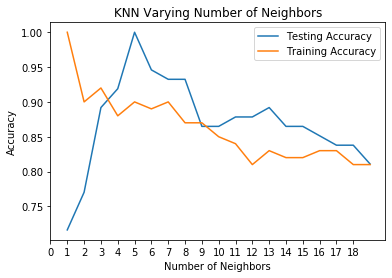

In [86]:
# Run KNN to determine optimal K value

n, test_acc, train_acc = optimizeK(X_train2_cmp, y_train2, X_test2_cmp, y_test2)
plotK(n, test_acc, train_acc)

In [87]:
n_neighbors=3
knn_ds2 = KNeighborsClassifier(n_neighbors)
knn_ds2.fit(X_train2_cmp, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [88]:
knn_ds2.score(X_test2_cmp, y_test2)

0.8918918918918919

In [89]:
knn_ds2_y_pred = knn_ds2.predict(X_test2_cmp)

In [90]:
y_test2

array([ 9,  1,  6,  4,  6,  5,  6,  6,  8, 11,  3,  1,  3,  3,  1,  4,  6,
        4,  6,  1,  1,  8,  1,  1,  1,  1,  1,  1,  1,  1,  5,  1,  6,  1,
        4,  4,  6,  8,  6,  6,  6,  6,  6,  8,  6,  9,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  3,  6,  6,  6,  6,  6,  8,  6,  6,
        6,  6,  6,  8,  2,  6])

In [91]:
knn_ds2_cm, knn_ds2_cra, knn_ds2_acc = getAccuracyMetrics(y_test2, knn_ds2_y_pred)

In [92]:
print(f'KNN Accuracy Score, k={n_neighbors}: {knn_ds2_acc}\n')
print(f'KNN Confusion Matrix, k={n_neighbors}\n\n{knn_ds2_cm}')
print(f'\n\t   KNN Classification Report, k={n_neighbors}\n\n{knn_ds2_cra}')

KNN Accuracy Score, k=3: 0.8918918918918919

KNN Confusion Matrix, k=3

[[13  0  0  1  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0]
 [ 1  0  0 17  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  0]
 [ 0  1  0  0  0 23  0  1  0]
 [ 1  0  0  0  0  0  5  0  0]
 [ 0  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1]]

	   KNN Classification Report, k=3

              precision    recall  f1-score   support

           1       0.87      0.87      0.87        15
           2       0.33      1.00      0.50         1
           3       1.00      1.00      1.00         4
           4       0.89      0.94      0.92        18
           5       1.00      0.50      0.67         2
           6       1.00      0.92      0.96        25
           8       1.00      0.83      0.91         6
           9       0.50      0.50      0.50         2
          11       0.50      1.00      0.67         1

    accuracy                           0.89        74
   macro avg       0.79 

In [93]:
# knn_cr = classification_report(y_test2, knn_ds2_y_pred, output_dict=True)

labels = np.arange(1,11)
len(labels)
y_test2

array([ 9,  1,  6,  4,  6,  5,  6,  6,  8, 11,  3,  1,  3,  3,  1,  4,  6,
        4,  6,  1,  1,  8,  1,  1,  1,  1,  1,  1,  1,  1,  5,  1,  6,  1,
        4,  4,  6,  8,  6,  6,  6,  6,  6,  8,  6,  9,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  3,  6,  6,  6,  6,  6,  8,  6,  6,
        6,  6,  6,  8,  2,  6])

In [96]:
def calculateMulticlassROCAUC(X_train, y_train, X_test, y_test, n, ident, k):
    labels = np.arange(1,n+1)
    y_bin = label_binarize(y_test, classes=labels)

    clf = OneVsRestClassifier(AdaBoostClassifier())
    y_score = clf.fit(X_train, y_train).decision_function(X_test)
    y_pred = clf.predict(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n):
        fpr[i], tpr[i], thresholds = roc_curve(y_bin[:, i], y_pred)
        roc_auc[i] = auc(fpr[i], tpr[i])

    for i in range(n):
        if math.isnan(roc_auc[i]):
            score = 0
        else: 
            score = roc_auc[i]
        plt.plot(fpr[i], tpr[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('fpr')
        plt.ylabel('tpr')
        plt.title(f'ROC Curve Label {i+1}, {ident}={k}, Score={score}')
        plt.show()

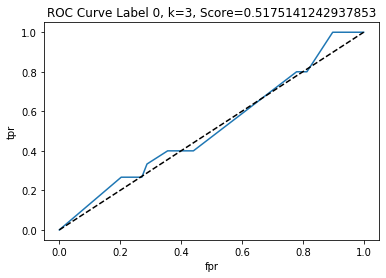

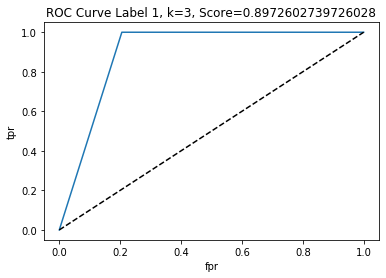

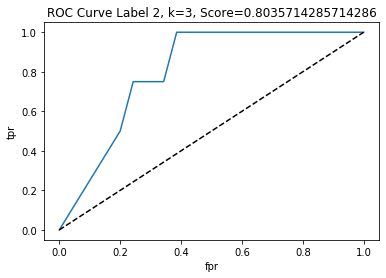

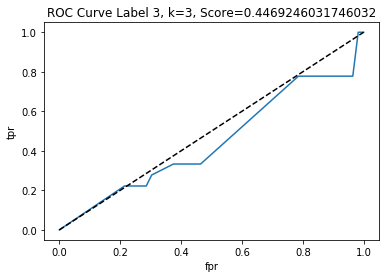

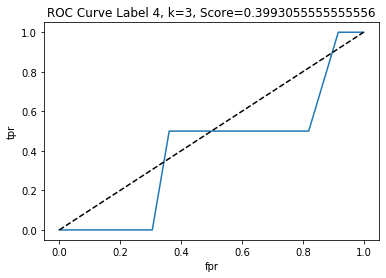

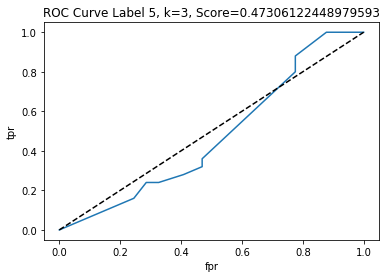

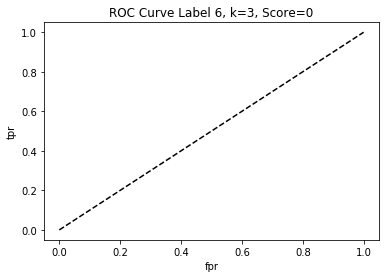

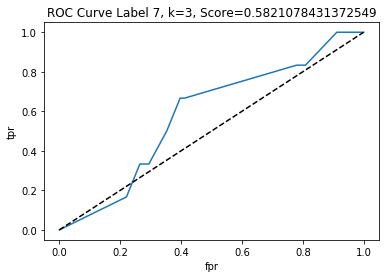

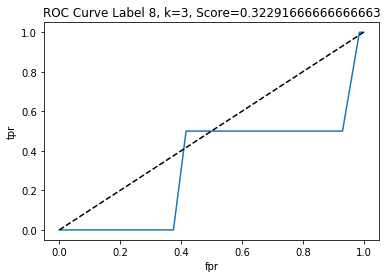

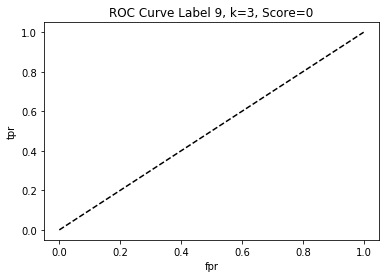

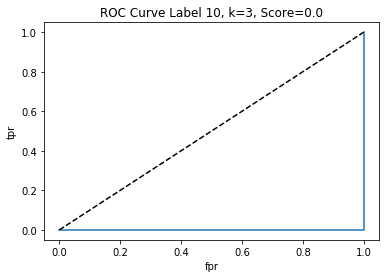

In [95]:
calculateMulticlassROCAUC(X_train2_cmp, y_train2, X_test2_cmp, y_test2, 11, 'k', 3)

In [ ]:
def trainFitAccuracyLR(s, e, X_train, y_train, X_test, y_test):    
    c = np.arange(s, e+1)
    cma = {}
    cra = {}
    acc = {}
    preds = {}
    for i in c:    
        lr = LogisticRegression(C=i, solver='lbfgs',random_state=0)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        cma[i] = confusion_matrix(y_test, y_pred)
        cra[i] = classification_report(y_test, y_pred)
        acc[i] = (accuracy_score(y_test, y_pred))
        preds[i] = y_pred
    return cma, cra, acc, preds

### Logistic Regression for DS2

In [ ]:
c = 10
lr_confusion_matricies, lr_classification_reports, lr_accuracies, lr_predictions = trainFitAccuracyLR(1, c, X_train2_cmp, y_train2, X_test2_cmp, y_test2)

In [ ]:
import operator
k = max(lr_accuracies.items(), key=operator.itemgetter(1))[0]
v = float(max(lr_accuracies.items(), key=operator.itemgetter(1))[1])

In [ ]:
print(f'Logistic Regression Highest Accuracy Score, C={k}: {v}\n')
print(f'Logistic Regression Most Accurate Confusion Matrix\n\n{lr_confusion_matricies[k]}')
print(f'\n\t   Logistic Regression Most Accurate Classification Report, C={k}\n\n{lr_classification_reports[k]}')

In [ ]:
calculateMulticlassROCAUC(X_train2_cmp, y_train2, X_test2_cmp, y_test2, n, ident, k)

## Random Forest for DS2

In [ ]:
rfc_ds2 = RandomForestClassifier()
rfc_ds2.fit(X_train2_cmp, y_train2)

In [ ]:
rfc_ds2_predict = rfc.predict(X_test2_cmp)

In [ ]:
rfc_ds2_cm, rfc_ds2_cra, rfc_ds2_acc = getAccuracyMetrics(y_test2, rfc_ds2_predict)

In [ ]:
print(f'Random Forest Accuracy Score: {rfc_ds2_acc}\n')
print(f'Random Forest Confusion Matrix, k={n_neighbors}\n\n{rfc_ds2_cm}')
print(f'\n\t   Random Forest Classification Report\n\n{rfc_ds2_cra}')

In [ ]:
rfc_ds2 = RandomForestClassifier()
rfc_ds2.fit(X_train2_cmp, y_train2)

In [ ]:
rfc_ds2_predict = rfc.predict(X_test2_cmp)

In [ ]:
rfc_ds2_cm, rfc_ds2_cra, rfc_ds2_acc = getAccuracyMetrics(y_test2, rfc_ds2_predict)

In [ ]:
print(f'Random Forest Accuracy Score: {rfc_ds2_acc}\n')
print(f'Random Forest Confusion Matrix, k={n_neighbors}\n\n{rfc_ds2_cm}')
print(f'\n\t   Random Forest Classification Report\n\n{rfc_ds2_cra}')

## SVM for DS2

# Dataset 3

In [ ]:
# X_train3
X_train3.head()

In [ ]:
n = X_train3[12][0]

for i in X_train3.keys():
    X_train3[i] = X_train3[i].replace(n, np.nan)

In [ ]:
X_train3.head()

In [ ]:
# X_train3_clean = fast_knn(X_train1.values, k=100)

In [ ]:
# # Logistic Regression
# log_reg = LogisticRegression(solver='lbfgs')
# log_reg.fit(X_train1, y_train1)